In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt	
import seaborn as sns	

In [41]:
# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

In [42]:
pd.set_option('display.max_columns', None)

In [43]:
df = pd.read_csv("archivo_casi_listo.csv", index_col=0)
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'capital/majorcity',
       'co2-emissions', 'cpi', 'cpichange', 'currency-code', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'largestcity', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'officiallanguage',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'latitud', 'longitud',
       'continent'],
      dtype='object')

¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

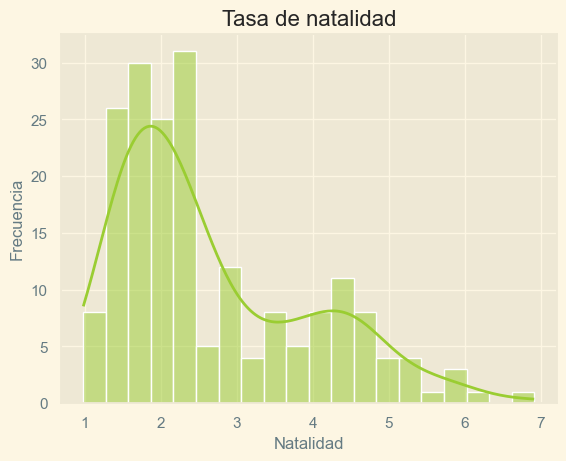

In [71]:
sns.histplot(data = df, x = "fertilityrate", bins = 20, kde = True, color= "yellowgreen")
plt.title("Tasa de natalidad")
plt.xlabel("Natalidad")
plt.ylabel("Frecuencia");

Vemos que la mayoria de los países tienen entre 1 y 2 hijos. Hay muy pocos que tengan una gran cantidad de hijos.

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

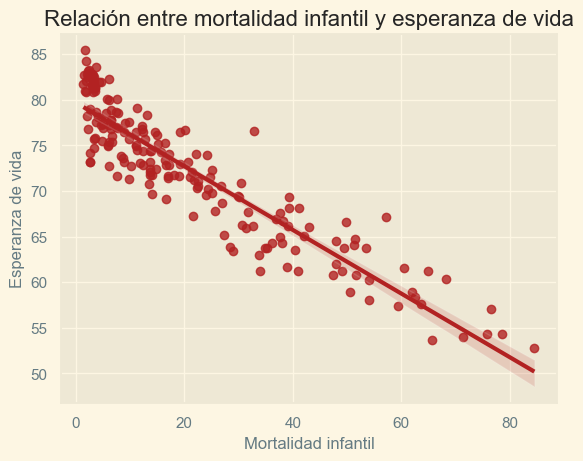

In [103]:
sns.regplot(x = "infantmortality", y = "lifeexpectancy", data = df, color="firebrick")
plt.title("Relación entre mortalidad infantil y esperanza de vida")
plt.xlabel("Mortalidad infantil")
plt.ylabel("Esperanza de vida");

Hay una relación negativa, cuanto más baja la mortalidad infantil mayor es la esperanza de vida y viceversa.

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [55]:
num_country = df.groupby("continent")["country"].count().reset_index()
num_country

,continent,country
0,Africa,53
1,Asia,48
2,Europe,44
3,North America,23
4,Oceania,14
5,South America,12
6,Unknown,1


In [47]:
num_country["continent"].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America', 'Unknown'], dtype=object)

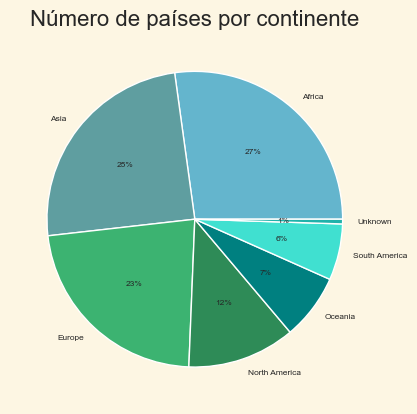

In [67]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]

plt.pie("country", labels= "continent",data = num_country, colors = colores, autopct= '%1.0f%%', textprops={'fontsize': 6})
plt.title("Número de países por continente");
#En este gráfico solo podemos expresarlo con porcentajes 

El continente con mayor número de países es África.
(El gráfico siguiente es para tenerlo nosotras para nuestro estudio y comparar resultados con los distintos gráficos)

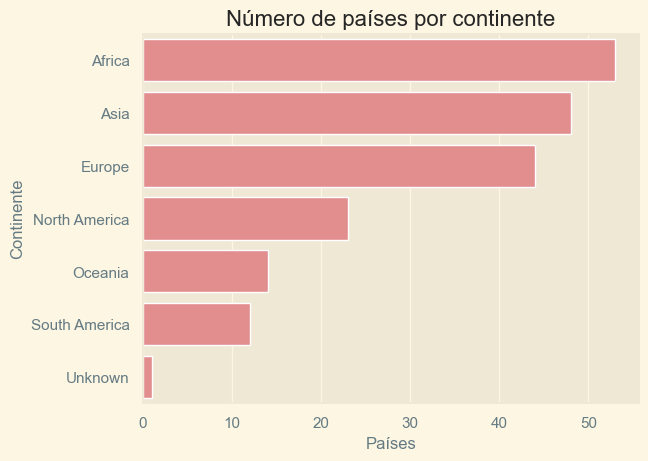

In [65]:
sns.barplot(y = "continent", x = "country", data = num_country, color= "lightcoral")
plt.title("Número de países por continente")
plt.xlabel("Países")
plt.ylabel("Continente");
#Podríamos haber usado el countplot pero con el df original, porque contaría cuantas veces aparecee África en el original

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos. 

In [12]:
euro_countries = df[df["continent"] == "Europe"]

In [52]:
euro_countries["lifeexpectancy"].describe()

count    44.000000
mean     78.788636
std       3.888457
min      71.600000
25%      75.475000
50%      79.950000
75%      82.150000
max      85.400000
Name: lifeexpectancy, dtype: float64

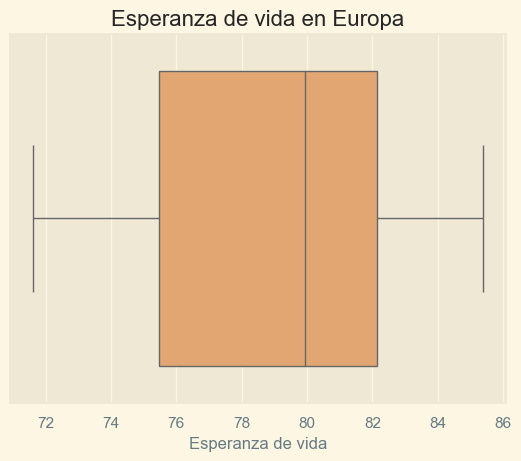

In [107]:
sns.boxplot(x= "lifeexpectancy", data= euro_countries, color= "salmon")
plt.title("Esperanza de vida en Europa")
plt.xlabel("Esperanza de vida");

- La mediana está en los casi 80 años (79.95). 
- El rango intercualtil se situa aproximadamente entre los 75,5 y los 82,1 años. 
- No encontramos valores atípicos.

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

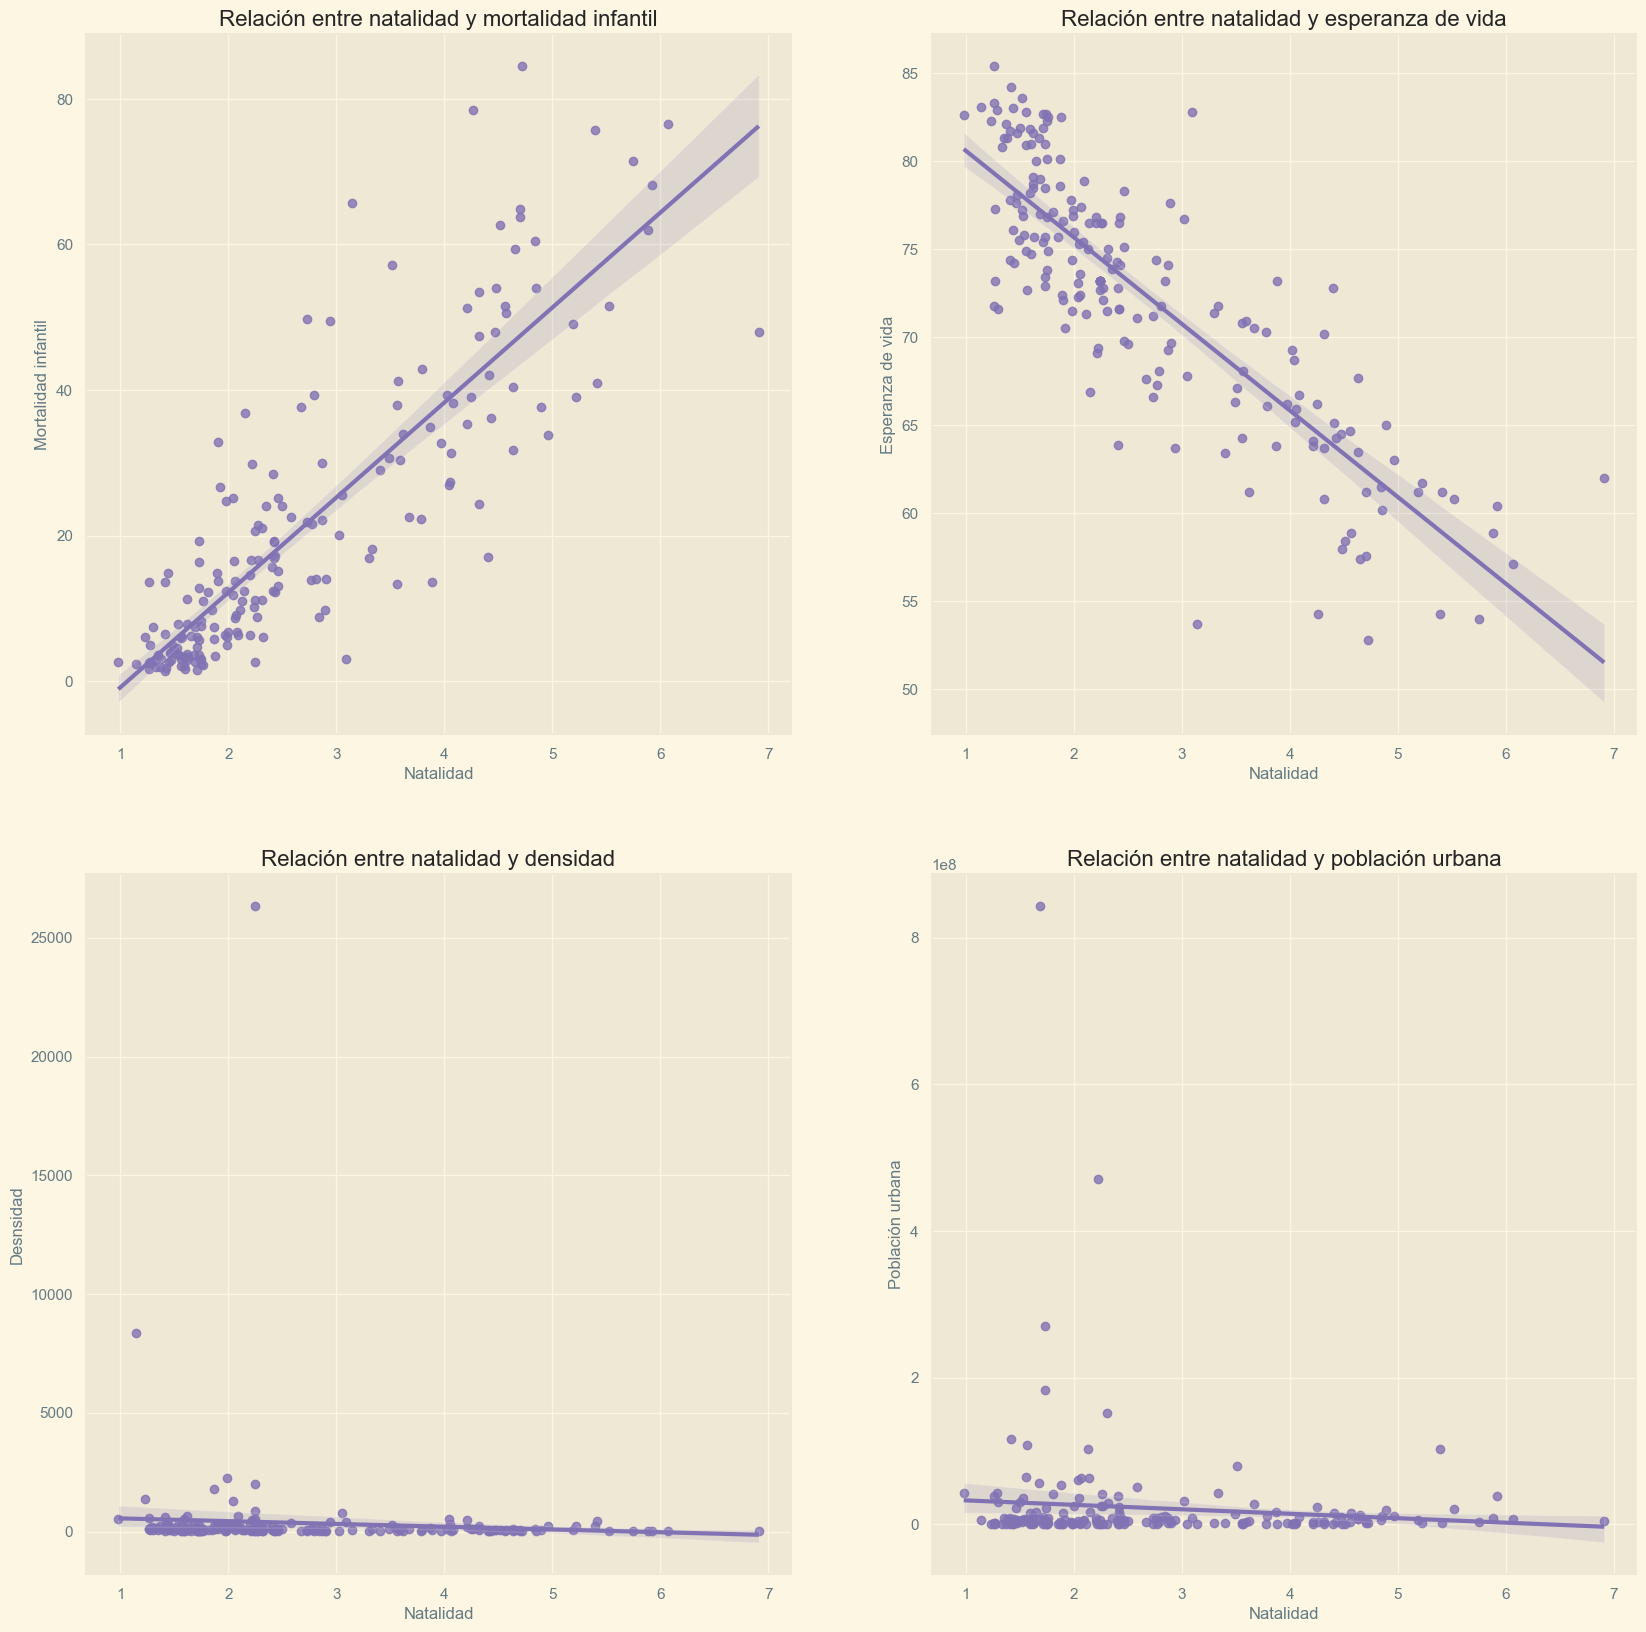

In [100]:
lista = ["infantmortality", "lifeexpectancy", "density", "urban_population"]
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
axes = axes.flat

for indice, elemento in enumerate(lista):
    sns.regplot(x ="fertilityrate", y = elemento, data = df, ax = axes[indice], color= "m")
    
    # Establece la etiqueta del eje x
    axes[indice].set_xlabel("Natalidad")

    # Establece la etiqueta del eje y de cada gráfica
    axes[0].set_ylabel("Mortalidad infantil")
    axes[1].set_ylabel("Esperanza de vida")
    axes[2].set_ylabel("Desnsidad")
    axes[3].set_ylabel("Población urbana")
    
    #Establecemos los títulos de cada gráfica
    axes[0].set_title("Relación entre natalidad y mortalidad infantil")
    axes[1].set_title("Relación entre natalidad y esperanza de vida")
    axes[2].set_title("Relación entre natalidad y densidad")
    axes[3].set_title("Relación entre natalidad y población urbana");
    

- *fertilityrate - infantmortality* --> Parece haber una relación positiva en cuanto a la tasa de natalidad y la mortalidad infantil, a mayor tasa de natalidad mayor es también la tasa de mortalidad y al revés. Es importante comentar que hay una mayor dispersión cuando la tasa de natalidad es de 3 o mayor.

- *fertilityrate - lifeexpectancy* --> Parece haber una relación negativa en cuanto a la tasa de natalidad y la esperanza de vida, cuanto más baja la mortalidad infantil mayor es la esperanza de vida y viceversa.

- *fertilityrate - density* --> No parece haber una correlación entre estas variables, aunque varíe la tasa de natalidad no lo hace la densidad.

- *fertilityrate - urban_population* --> Hay una ligera tendencia negativa, cuanto menor es la tasa de natalidad mayor es la población urbana y a mayor tasa de natalidad menor la población urbana. Podemos entender que las familias urbanas tienen menos hijos que las que viven en el campo.

6. ¿Cuáles son los 10 países con la mayor área forestal?

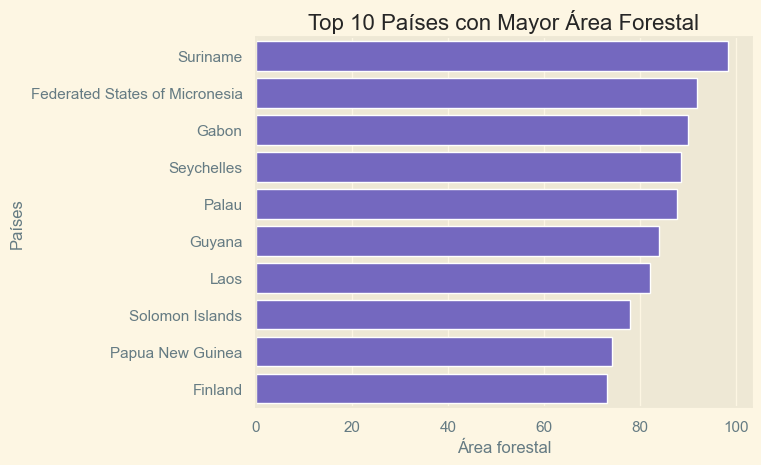

In [142]:
# Primero buscamos los 10 países con la mayor área forestal
top_10_countries = df.nlargest(10, "forestedarea")

# Crear el gráfico de barras
sns.barplot(x="forestedarea", y="country", data=top_10_countries, color="slateblue")
plt.title("Top 10 Países con Mayor Área Forestal")
plt.xlabel("Área forestal")
plt.ylabel("Países");

7. ¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

/var/folders/np/2h53vflx42jd3w_yxn33bvv40000gn/T/ipykernel_22383/67903561.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="fertilityrate", y="continent", data=df, palette="magma")


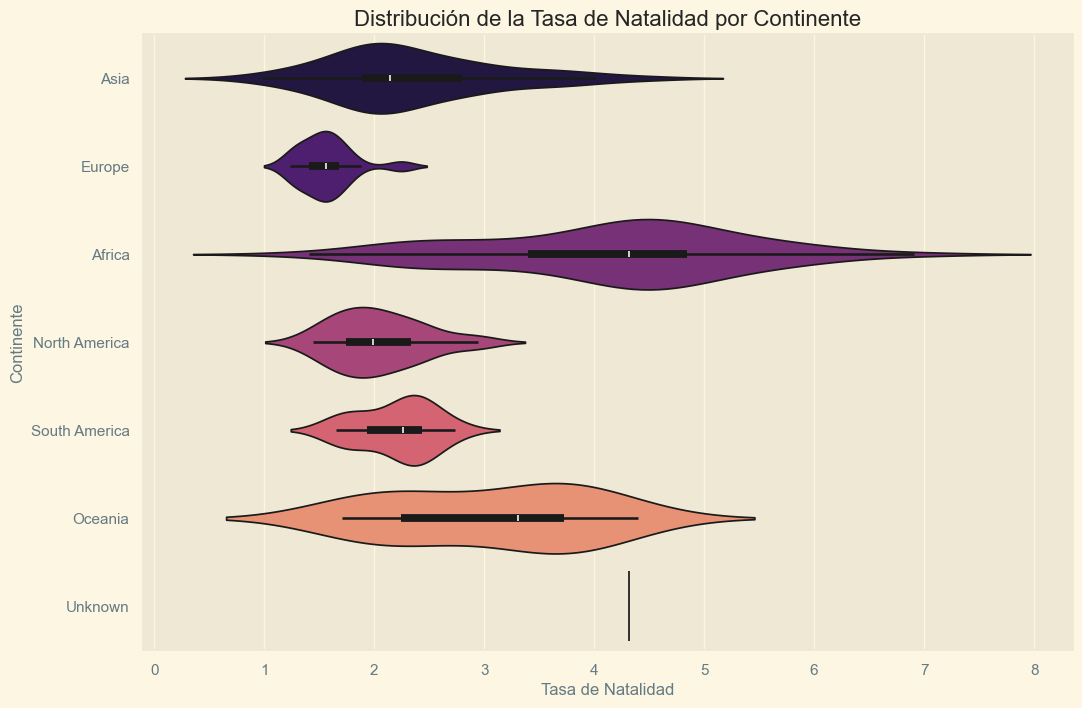

In [140]:
# Ajusta el tamaño de la figura según tus preferencias
plt.figure(figsize=(12, 8))

# Crea un gráfico de violín
sns.violinplot(x="fertilityrate", y="continent", data=df, palette="magma")

# Añade etiquetas y título
plt.xlabel("Tasa de Natalidad")
plt.ylabel("Continente")
plt.title("Distribución de la Tasa de Natalidad por Continente")

# Muestra el gráfico
plt.show()

Vemos diferencias notables en la tasa de natalidad entre continentes, por ejemplo, en Europa vemos la menor mediana, situandose en torno al 1,5 Asía, y América, tanto norte como sur, son más similares entre los dos y 2,5, Oceanía asciende a 3,5 y la mayor tasa es la de África con 4,5.